In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np

# To get the businesses for each district
Be careful with the filepaths--may need to change depending on where the files are saved.

In [ ]:
# Set filepath for the shapefile
fp = "City_Council_Districts_View/city_council_districts.shp"
# Read shapefile using gpd.read_file()
map_df = gpd.read_file(fp)

# Set [map_df.DISTRICT == DISTRUCT_NUM]
# Can change the district_num to a district of choice
district_num = 4
d4 = map_df[map_df.DISTRICT == district_num]
d4 = d4[['DISTRICT', 'geometry']]

# Set coordinate system to the same !! very important!!!
d4 = d4.to_crs(epsg=4326)
business_df = pd.read_csv('businessList.csv') #print(business_df) ([4938 rows x 13 columns])
# Create geometry series
business_gp = gpd.GeoDataFrame(business_df, geometry=gpd.points_from_xy(business_df.longitude, business_df.latitude)) #print(business_gp) ([4938 rows x 14 columns])
business_gp = business_gp.set_crs(d4.crs, allow_override=True)
business_gp['district'] = ''
# Join 
datajoin4 = gpd.sjoin( business_gp, d4, how = 'inner', predicate = 'within')

# Export to csv file, can change file name (fn)
fn = "district4_businesses.csv"
datajoin4.to_csv(fn, index= False)

# Get the business types

In [30]:
#read in all the csv files for each district
df1 = pd.read_csv("ds-councilor-worrell-small-business/data/district1_businesses.csv")
df2 = pd.read_csv("ds-councilor-worrell-small-business/data/district2_businesses.csv")
df3 = pd.read_csv("ds-councilor-worrell-small-business/data/district3_businesses.csv")
df4 = pd.read_csv("ds-councilor-worrell-small-business/data/district4_businesses.csv")
df5 = pd.read_csv("ds-councilor-worrell-small-business/data/district5_businesses.csv")
df6 = pd.read_csv("ds-councilor-worrell-small-business/data/district6_businesses.csv")
df7 = pd.read_csv("ds-councilor-worrell-small-business/data/district7_businesses.csv")
df8 = pd.read_csv("ds-councilor-worrell-small-business/data/district8_businesses.csv")
df9 = pd.read_csv("ds-councilor-worrell-small-business/data/district9_businesses.csv")

#look at the business types based on 'NAICS_2017_2digit_desc' for each district
d1_businesstypeNAICS2digit = df1['NAICS_2017_2digit_desc'].value_counts(dropna = False)
d2_businesstypeNAICS2digit = df2['NAICS_2017_2digit_desc'].value_counts(dropna = False)
d3_businesstypeNAICS2digit = df3['NAICS_2017_2digit_desc'].value_counts(dropna = False)
d4_businesstypeNAICS2digit = df4['NAICS_2017_2digit_desc'].value_counts(dropna = False)
d5_businesstypeNAICS2digit = df5['NAICS_2017_2digit_desc'].value_counts(dropna = False)
d6_businesstypeNAICS2digit = df6['NAICS_2017_2digit_desc'].value_counts(dropna = False)
d7_businesstypeNAICS2digit = df7['NAICS_2017_2digit_desc'].value_counts(dropna = False)
d8_businesstypeNAICS2digit = df8['NAICS_2017_2digit_desc'].value_counts(dropna = False)
d9_businesstypeNAICS2digit = df9['NAICS_2017_2digit_desc'].value_counts(dropna = False)

In [ ]:
#save results to csv file
d1_businesstypeNAICS2digit.to_csv("d1_businesstypeNAICS2digit.csv", index= False)
d2_businesstypeNAICS2digit.to_csv("d2_businesstypeNAICS2digit.csv", index= False)
d3_businesstypeNAICS2digit.to_csv("d3_businesstypeNAICS2digit.csv", index= False)
d4_businesstypeNAICS2digit.to_csv("d4_businesstypeNAICS2digit.csv", index= False)
d5_businesstypeNAICS2digit.to_csv("d5_businesstypeNAICS2digit.csv", index= False)
d6_businesstypeNAICS2digit.to_csv("d6_businesstypeNAICS2digit.csv", index= False)
d7_businesstypeNAICS2digit.to_csv("d7_businesstypeNAICS2digit.csv", index= False)
d8_businesstypeNAICS2digit.to_csv("d8_businesstypeNAICS2digit.csv", index= False)
d9_businesstypeNAICS2digit.to_csv("d9_businesstypeNAICS2digit.csv", index= False)

In [14]:
# read in the overal businesses
df = pd.read_csv("ds-councilor-worrell-small-business/data/businesses_districts.csv")

In [3]:
df = df[['NAICS_2017_2digit_desc', 'DISTRICT']]

In [13]:
#plot a bar graph of business types of all districts

fig = plt.figure(figsize= (50, 200))
ax = fig.add_subplot(1, 1, 1)
sns.set(font_scale=1.5)
sns.countplot(data= df, axes= ax, y= 'NAICS_2017_2digit_desc', hue= 'DISTRICT')
for container in ax.containers:
    ax.bar_label(container)
ax.tick_params(labelsize=20)
# ax.bar_label(ax.containers[0])

In [14]:
#save the bar graph
fig.savefig("businesstypes_alldistricts_bar.png")

### Create bar graph of just district 4's business types

In [16]:
# read in file
df4 = pd.read_csv("ds-councilor-worrell-small-business/data/district4_businesses_regrouped.csv")

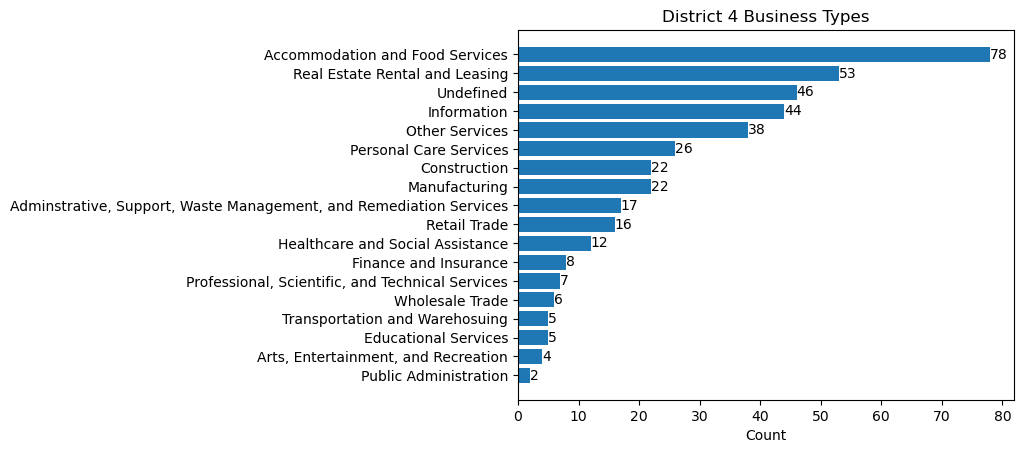

In [17]:
# clean
df4 = df4[['NAICS_2017_2digit_desc']]
businesstypeNAICS2digit = df4['NAICS_2017_2digit_desc'].value_counts(dropna = False)
df4 = df4.fillna('Undefined')

count = np.array(df4['NAICS_2017_2digit_desc'].value_counts(dropna = False))
types = df4['NAICS_2017_2digit_desc'].unique()

# plot
img = plt.rcdefaults()
fig, ax = plt.subplots()
bars = ax.barh(types, count)
ax.bar_label(bars)
ax.invert_yaxis()  # labels read vertically
ax.set_xlabel('Count')
ax.set_title('District 4 Business Types')

plt.savefig("district4_businesstypes.png")
plt.show()


In [83]:
fig.savefig("district4_businesses_regrouped_bar.png")

# District 4 Certified Businesses

In [18]:
# read in district4 's csv
d4_df = pd.read_csv("ds-councilor-worrell-small-business/data/district4_businesses.csv")

In [22]:
# copy 'business_name' under a new columned called 'company_name'
d4_df['company_name'] = d4_df['business_name']
d4_df.head(3)

,latitude,longitude,business_name,street_address,zip,NAICS_2017_6digit_code,NAICS_2017_6digit_desc,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet,geometry,district,index_right,DISTRICT,Name,company_name
0,42.311327,-71.080831,wingz + tingz,388 Blue Hill Ave,2121,722511,Full-Service Restaurants,72,Accommodation and Food Services,5.0,1 to 9,Grove Hall,POINT (-71.080831 42.311327),NaN,6,4,wingz + tingz,wingz + tingz
1,42.305682,-71.081282,washington columbia li,95 Washington St,2121,531210,Offices of Real Estate Agents and Brokers,53,Real Estate Rental and Leasing,3.0,1 to 9,Grove Hall,POINT (-71.081282 42.305682),NaN,6,4,washington columbia li,washington columbia li
2,42.305682,-71.081282,washington columbia ii apartments,95 Washington St,2121,0,NaN,99,Undefined,5.0,1 to 9,Grove Hall,POINT (-71.081282 42.305682),NaN,6,4,washington columbia ii apartments,washington columbia ii apartments


### Certified Businesses

In [23]:
#certified business directory
cbd_df = pd.read_csv("ds-councilor-worrell-small-business/data/certifiedbusinessdirectory.csv")
cbd_df.head(3)

,company_name,services_provided,mbe_wbe_cert,small_local_cert,veteran_cert,sdo_certified,city_registered,address,city,state,...,number_employees,cob_category_codes1,cob_category_codes2,cob_category_codes3,naics_codes1,naics_codes2,naics_codes3,unspsc_code1,unspsc_code2,unspsc_code3
0,"9THAI EXPRESS , LLC",FULL SERVICES OF RESTAURANT,MBE,NaN,NaN,No,No,"433 Cambridge Street, FIRST FLOOR., Boston, MA...",Boston,MA,...,Less than 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turning On the Lights Global Institute,Digital Coaching Service for Small Business Ow...,MWBE,NaN,NaN,No,No,"6 LIBERTY SQ, Suite 3013, Boston, MA 02109",Boston,MA,...,Less than 10,TA - Training (see also ED),BU - Business Management Consultants,MK - Marketing,611430 - Professional and Management Developme...,541613 - Marketing Consulting Services,NaN,86130000 - Specialized educational services,86120000 - Educational institutions,NaN
2,American Dream Home Care Agency LLC,"Personal care attended , educations",WBE,NaN,NaN,No,No,"33 Dover Street, Brockton, MA 2301",Brockton,MA,...,11 - 20,"AHS - Health Care (Providers, Services)",NaN,NaN,621610 - Home Health Care Services,NaN,NaN,85100000 - Comprehensive health services,NaN,NaN


In [32]:
#certified business directory
cbd_df = pd.read_csv("ds-councilor-worrell-small-business/data/Black&Brown-Owned_SelfIdentified_List.csv")
cbd_df.head()

,Name,Website,Contact phone,Contact email,Type of business,Address,Neighborhood,Business ownership,Business category,Business sub type,Supplemental information
0,2 Dogs Treats,www.2dogstreats.com,(617) 286-4844,mike@2dogstreats.com,Online,NaN,NaN,"Minority-owned,Immigrant-owned",Retail,NaN,We are a Dorchester-based dog treat business f...
1,1981andCo,www.1981andco.com,(617) 750-5896,1981andcophotography@gmail.com,Online,NaN,NaN,"Black-owned,Minority-owned",Professional services,NaN,"I do portrait work, art photography sessions, ..."
2,A & M Home Services LLC,NaN,(617) 697-2353,aandmhomeservices@yahoo.com,NaN,34 Vale Street,NaN,NaN,Home-based services,Landscaping,NaN
3,"A Better Resolution, Inc.",NaN,(617) 338-2022,frank@abetterresolution.com,NaN,"1313 Washington Street, Suite 519 Boston, MA ...",NaN,NaN,Arts & culture,NaN,NaN
4,A Gill of all Trades,www.agillofalltrades.com,(617) 922-7283,gmiller@agillofalltrades.com,Online,NaN,NaN,"Black-owned,Women-owned",Professional services,NaN,NaN


In [33]:
#get street address from cbd_df['address']
def extract_streetaddress(df):
    splitA = df['Address'].str.split(',')
    df['street_address'] = splitA.str[0]
    return df


In [36]:
cbd_df = cbd_df.dropna(subset = ['Address'])

In [39]:
extract_streetaddress(cbd_df)
cbd_df.head(10)

,Name,Website,Contact phone,Contact email,Type of business,Address,Neighborhood,Business ownership,Business category,Business sub type,Supplemental information,street_address
2,A & M Home Services LLC,NaN,(617) 697-2353,aandmhomeservices@yahoo.com,NaN,34 Vale Street,NaN,NaN,Home-based services,Landscaping,NaN,34 Vale Street
3,"A Better Resolution, Inc.",NaN,(617) 338-2022,frank@abetterresolution.com,NaN,"1313 Washington Street, Suite 519 Boston, MA ...",NaN,NaN,Arts & culture,NaN,NaN,1313 Washington Street
5,"A-Plus Welding and Engineering, Inc.",NaN,(857) 389-6243,weldboston54@gmail.com,NaN,"366 Walnut Avenue Roxbury, MA 02119-",NaN,Certified MWBE,Construction,Contractor,NaN,366 Walnut Avenue Roxbury
6,"A.C.S. Mechanical, LLC",NaN,(781) 308-1151,acsmechanical@hotmail.com,NaN,"300 Washington Street, #3 Dorchester, MA 02121-",NaN,Certified MWBE,Construction,Contractor,NaN,300 Washington Street
7,A.J. Williams Event,NaN,(617) 267-2244,aj@ajwilliamsevents.com,NaN,"75 Newbury Street, 3rd Floor Boston, MA 02116",NaN,Certified MWBE,Professional services,Consulting,NaN,75 Newbury Street
8,A.O. Security Services,NaN,(617) 970-6772,aossinc1@gmail.com,NaN,"2 Drayton Avenue Dorchester, MA 02125-2403",NaN,NaN,Other,NaN,NaN,2 Drayton Avenue Dorchester
10,Abel Floor Covering,NaN,(617) 288-0103,abelfloor@verizon.net,NaN,"410 Neponset Avenue Dorchester, MA 02122",NaN,Certified MWBE,Construction,Contractor,NaN,410 Neponset Avenue Dorchester
12,"Above and Beyond Catering, Inc.",NaN,(617) 426-5999,mark@aboveabc.com,NaN,"42 Plympton Street Boston, MA 02118",NaN,NaN,Restaurant & food service,Catering,NaN,42 Plympton Street Boston
15,Advertising Business Concepts,NaN,(617) 445-6171,abconcepts1@verizon.net,NaN,"8 Dennison Street Roxbury, MA 02119",NaN,Certified MWBE,Professional services,Printing services,NaN,8 Dennison Street Roxbury
16,"Advoqt, LLC",NaN,(617) 835-4525,rm@advocatetg.com,Brick & mortar,"10 Guest Street, Suite 290 Boston, MA 02135-",NaN,Certified MWBE,Professional services,Consulting,NaN,10 Guest Street


cbd_df_d4 = pd.merge(cbd_df, d4_df, how = "inner", on="street_address")

merging on street address currently does not work because
certifiedbusinessdirectory fully spells out street abbreviations eg: Quincy Street 
while d4 uses abbreviations eg: Quincy St
so the dataframes are unable to be merged.

Need to parse through and convert the Street to St / Avenue to Ave etc

In [40]:
cbd_df_d4 = pd.merge(cbd_df, d4_df, how = "inner", on="street_address")

cbd_df_d4.head()

,Name_x,Website,Contact phone,Contact email,Type of business,Address,Neighborhood,Business ownership,Business category,Business sub type,...,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet,geometry,district,index_right,DISTRICT,Name_y
0,4 Corners Yoga + Wellness LLC,www.4cornersyogawellness.com,(617) 506-0519,info@4cornersyogawellness.com,Brick & mortar,336 Washington St,Dorchester,"Black-owned,Women-owned",Wellness,"Massage, Yoga",...,61,Educational Services,1.0,1 to 9,Four Corners,POINT (-71.0737 42.299669),NaN,6,4,4 corners yoga + wellness
1,CKW Management Inc,NaN,(617) 237-0697,coleen@spotlightagency.net,Home-based,"1773 Dorchester Ave, Dorchester, MA 02124",Dorchester,"Black-owned,Certified MWBE,Immigrant-owned,Wom...",Professional service,"Consulting, Coaching",...,23,Construction,2.0,1 to 9,Greater Ashmont,POINT (-71.063683 42.288998),NaN,6,4,star contracting co
2,CKW Management Inc,NaN,(617) 237-0697,coleen@spotlightagency.net,Home-based,"1773 Dorchester Ave, Dorchester, MA 02124",Dorchester,"Black-owned,Certified MWBE,Immigrant-owned,Wom...",Professional service,"Consulting, Coaching",...,54,"Professional, Scientific, and Technical Services",5.0,1 to 9,Greater Ashmont,POINT (-71.063683 42.288998),NaN,6,4,osa service
3,CKW Management Inc,NaN,(617) 237-0697,coleen@spotlightagency.net,Home-based,"1773 Dorchester Ave, Dorchester, MA 02124",Dorchester,"Black-owned,Certified MWBE,Immigrant-owned,Wom...",Professional service,"Consulting, Coaching",...,81,Other Services,0.0,Not Available,Greater Ashmont,POINT (-71.063683 42.288998),NaN,6,4,maat therapeutic solutions inc
4,CKW Management Inc,NaN,(617) 237-0697,coleen@spotlightagency.net,Home-based,"1773 Dorchester Ave, Dorchester, MA 02124",Dorchester,"Black-owned,Certified MWBE,Immigrant-owned,Wom...",Professional service,"Consulting, Coaching",...,81,Other Services,9.0,1 to 9,Greater Ashmont,POINT (-71.063683 42.288998),NaN,6,4,jmn outreach inc


In [16]:
d4_df['Name']

0                          wingz + tingz
1                 washington columbia li
2      washington columbia ii apartments
3                 washington columbia ii
4                           vip wireless
                     ...                
406                        ashmont grill
407                   ashmont cycles inc
408              aftab uddin biswas corp
409                     1943 dot ave llc
410                  american provisions
Name: Name, Length: 411, dtype: object

In [18]:
cbd_df['Name'] = cbd_df['Name'].str.lower()

In [20]:
cbd_df_d4 = pd.merge(cbd_df, d4_df, how = "inner", on="Name")

cbd_df_d4.head()


,Name,Website,Contact phone,Contact email,Type of business,Address,Neighborhood,Business ownership,Business category,Business sub type,...,NAICS_2017_6digit_desc,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet,geometry,district,index_right,DISTRICT
0,down home delivery & catering,downhomedelivery.com,(646) 226-0118,dhdc2008@gmail.com,Brick & mortar,"2 Bowdoin St., Dorchester, MA. 02124",Dorchester,"Black-owned,Women-owned",Restaurant & food service,"Delivery, Catering, Take-out, Other",...,Limited-Service Restaurants,72,Accommodation and Food Services,5.0,1 to 9,Four Corners,POINT (-71.073321 42.299642),NaN,6,4
1,porta classica,www.portaclassica.com,(516) 830-5555,portaclassicama@gmail.com,Brick & mortar,478 Blue Hill Ave,Dorchester,"Minority-owned,Immigrant-owned",Retail,NaN,...,Men's Clothing Stores,44,Retail Trade,7.0,1 to 9,Grove Hall,POINT (-71.083183 42.307953),NaN,6,4
2,pure oasis,https://www.mypureoasis.com/,(617) 420-6838,NaN,Brick & mortar,430 Blue Hill Avenue,Dorchester,Black-owned,Retail,NaN,...,All Other Miscellaneous Store Retailers (excep...,45,Retail Trade,2.0,1 to 9,Grove Hall,POINT (-71.0828 42.3082),NaN,6,4


In [ ]:
replacers = {' St':' Street' , ' Ave': ' Avenue', ' Rd': ' Road'}

d4_testdf = d4_df.copy(deep = True)

d4_testdf['street_address'] = d4_testdf['street_address'].str.replace(" St", " Street")
d4_testdf['street_address'] = d4_testdf['street_address'].str.replace(" Ave", " Avenue")
d4_testdf['street_address'] = d4_testdf['street_address'].str.replace(" Rd", " Road")

d4_testdf['street_address']


0        388 Blue Hill Avenue
1        95 Washington Street
2        95 Washington Street
3           102 Columbia Road
4        482 Blue Hill Avenue
                ...          
406         555 Talbot Avenue
407    1977 Dorchester Avenue
408    1911 Dorchester Avenue
409    1943 Dorchester Avenue
410    1971 Dorchester Avenue
Name: street_address, Length: 411, dtype: object

In [ ]:
cbd_df_d4 = pd.merge(cbd_df, d4_testdf, how = "inner", on="street_address")

cbd_df_d4.head()

,company_name_x,services_provided,mbe_wbe_cert,small_local_cert,veteran_cert,sdo_certified,city_registered,address,city,state,...,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet,geometry,district,index_right,DISTRICT,company_name_y
0,"EMZ Rainbow Laundromat, LLC",Laundry services; laundromat,MBE,SLBE,NaN,No,Yes,"9 Bowdoin Street, Dorchester, MA 2124",Dorchester,MA,...,81,Other Services,1.0,1 to 9,Four Corners,POINT (-71.073051 42.299389),NaN,6,4,emz rainbow laundromat
1,"OSA Services, Inc.","Accounting, bookkeeping, payroll, taxation ser...",MBE,SLBE,NaN,No,No,"1773 Dorchester Avenue, Suite 2A, Dorchester, ...",Dorchester,MA,...,23,Construction,2.0,1 to 9,Greater Ashmont,POINT (-71.063683 42.288998),NaN,6,4,star contracting co
2,"OSA Services, Inc.","Accounting, bookkeeping, payroll, taxation ser...",MBE,SLBE,NaN,No,No,"1773 Dorchester Avenue, Suite 2A, Dorchester, ...",Dorchester,MA,...,54,"Professional, Scientific, and Technical Services",5.0,1 to 9,Greater Ashmont,POINT (-71.063683 42.288998),NaN,6,4,osa service
3,"OSA Services, Inc.","Accounting, bookkeeping, payroll, taxation ser...",MBE,SLBE,NaN,No,No,"1773 Dorchester Avenue, Suite 2A, Dorchester, ...",Dorchester,MA,...,81,Other Services,0.0,Not Available,Greater Ashmont,POINT (-71.063683 42.288998),NaN,6,4,maat therapeutic solutions inc
4,"OSA Services, Inc.","Accounting, bookkeeping, payroll, taxation ser...",MBE,SLBE,NaN,No,No,"1773 Dorchester Avenue, Suite 2A, Dorchester, ...",Dorchester,MA,...,81,Other Services,9.0,1 to 9,Greater Ashmont,POINT (-71.063683 42.288998),NaN,6,4,jmn outreach inc


In [ ]:
cbd_df_d4.to_csv("district4_certifiedbusiness.csv")